<class 'scipy.sparse._csr.csr_matrix'> (3812, 1083)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['00' '01' '02' ... 'your' 'zip' 'zone']
[[ 14.1771555  41.949272 ]
 [-43.930374  102.199646 ]
 [ 14.492726   41.556904 ]
 ...
 [  9.996551   15.064587 ]
 [ 72.94318    12.698404 ]
 [-17.782436   66.312645 ]]


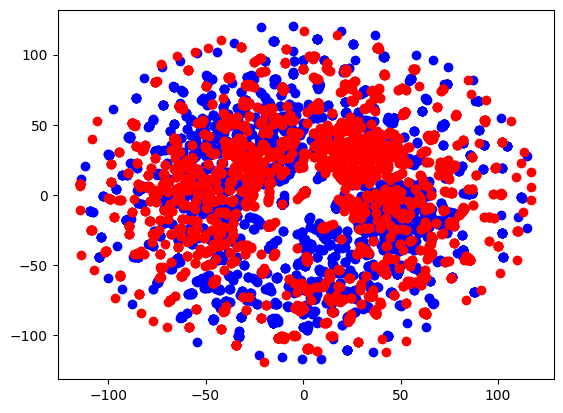

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data = pd.read_csv('open_ave_data.csv',header=0,
        usecols=["findings", "clinicaldata", "ExamName", "impression"], nrows=10000)
clinicaldata_list = data['clinicaldata'].tolist()
cleaned_clinical = [x for x in clinicaldata_list if str(x) != 'nan']
findings_list = data['findings'].tolist()
examname_list = data['ExamName'].tolist()
impression_list = data['impression'].tolist()

final_list = findings_list + cleaned_clinical + examname_list + impression_list
cleaned_list = [x for x in final_list if str(x) != 'nan']
test_list = findings_list + impression_list

cv=CountVectorizer() 
word_count_vector=cv.fit_transform(final_list)

tr_idf_model  = TfidfVectorizer()
tf_idf_vector = tr_idf_model.fit_transform(final_list)
tr_idf_model2  = TfidfVectorizer()
tf_idf_vector2 = tr_idf_model.fit_transform(final_list)

print(type(tf_idf_vector), tf_idf_vector.shape)
tf_idf_array = tf_idf_vector.toarray()

print(tf_idf_array)
words_set = tr_idf_model.get_feature_names_out()
print(words_set)

X_embedded = TSNE(n_components = 2, learning_rate='auto', init = 'random', perplexity = 3).fit_transform(tf_idf_vector)
X_embedded2 = TSNE(n_components = 2, learning_rate='auto', init = 'random', perplexity = 3).fit_transform(tf_idf_vector2)
print(X_embedded)

plt.scatter(x=X_embedded[:,0], y=X_embedded[:,1], color="blue")
plt.scatter(x=X_embedded2[:,0], y=X_embedded2[:,1], color="red")

plt.show()

<class 'scipy.sparse._csr.csr_matrix'> (1908, 819)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[ -8.803652   65.22073  ]
 [-32.46601    19.114992 ]
 [ -9.41121    64.99502  ]
 ...
 [-40.34393   -42.411057 ]
 [ 69.0216     55.26724  ]
 [  2.1246016  -4.451304 ]]


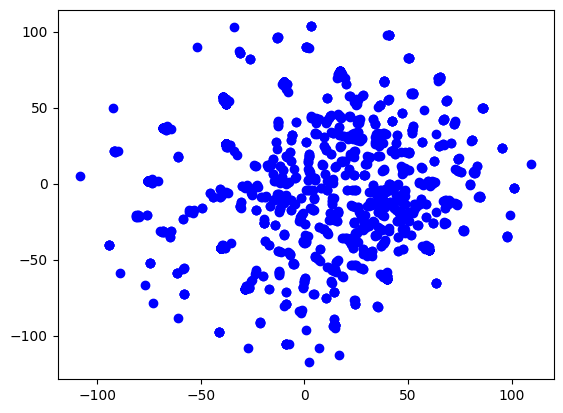

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data = pd.read_csv('open_ave_data.csv',header=0,
        usecols=["findings", "clinicaldata", "ExamName", "impression"], nrows=10000)
clinicaldata_list = data['clinicaldata'].tolist()
findings_list = data['findings'].tolist()
examname_list = data['ExamName'].tolist()
impression_list = data['impression'].tolist()

final_list = findings_list + clinicaldata_list + examname_list + impression_list
test_list = findings_list + impression_list

cv=CountVectorizer() 
word_count_vector=cv.fit_transform(findings_list)

tr_idf_model  = TfidfVectorizer()
tf_idf_vector = tr_idf_model.fit_transform(test_list)

print(type(tf_idf_vector), tf_idf_vector.shape)
tf_idf_array = tf_idf_vector.toarray()

print(tf_idf_array)
words_set = tr_idf_model.get_feature_names_out()

X_embedded = TSNE(n_components = 2, learning_rate='auto', init = 'random', perplexity = 3).fit_transform(tf_idf_vector)
print(X_embedded)

plt.scatter(x=X_embedded[:,0], y=X_embedded[:,1], color="blue")

plt.show()